## PART 1: Data Import and Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df_train = pd.read_csv('../data/train.csv')

In [4]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
df_train.shape

(2051, 81)

In [6]:
df_train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [7]:
df_train.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [8]:
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')

In [9]:
list(df_train.columns)

['id',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_are

In [10]:
df_final = df_train.select_dtypes(include=[int, float])

In [11]:
# adding neighborhood columns from train dataset
df_final = pd.merge(df_final, df_train[['id', 'neighborhood']], on='id', how='left')

In [12]:
df_final.isna().sum()

id                   0
pid                  0
ms_subclass          0
lot_frontage       330
lot_area             0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
mas_vnr_area        22
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
bsmt_full_bath       2
bsmt_half_bath       2
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
totrms_abvgrd        0
fireplaces           0
garage_yr_blt      114
garage_cars          1
garage_area          1
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
saleprice            0
neighborhood         0
dtype: int64

In [13]:
df_final['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

In [14]:
df_final.shape

(2051, 40)

In [15]:
df_final.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [16]:
df_final.isna().sum()

id                   0
pid                  0
ms_subclass          0
lot_frontage       330
lot_area             0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
mas_vnr_area        22
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
bsmt_full_bath       2
bsmt_half_bath       2
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
totrms_abvgrd        0
fireplaces           0
garage_yr_blt      114
garage_cars          1
garage_area          1
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
saleprice            0
neighborhood         0
dtype: int64

In [17]:
# filled null values with mean in lot_frontage
df_final['lot_frontage'] = df_final['lot_frontage'].fillna(df_final['lot_frontage'].mean())

In [18]:
df_final['lot_frontage'].value_counts()

69.0552     330
60.0000     179
70.0000      96
80.0000      94
50.0000      90
           ... 
119.0000      1
122.0000      1
22.0000       1
155.0000      1
135.0000      1
Name: lot_frontage, Length: 119, dtype: int64

In [19]:
df_final['full_bath'].value_counts()

2    1096
1     900
3      45
0       8
4       2
Name: full_bath, dtype: int64

In [20]:
df_final = df_final[df_final['full_bath'] > 0]

In [21]:
df_final['totrms_abvgrd'].value_counts()

6     595
7     474
5     405
8     228
4     144
9      98
10     49
11     22
12     13
3      11
14      1
2       1
13      1
15      1
Name: totrms_abvgrd, dtype: int64

In [22]:
df_final = df_final[df_final['totrms_abvgrd'] < 13]

In [23]:
# Dropping unusefull columns
df_final = df_final.drop(columns = ['garage_yr_blt', 'pid'])

In [24]:
df_final.dropna(inplace=True)

In [25]:
# Got better r2 score by using that but because of dat dictionary, I'm not gonna use that!!
##df_final = pd.get_dummies(data=df_final, columns= ['neighborhood'], prefix = None)

In [26]:
##df_final = pd.merge(df_final, df_train[['id', 'neighborhood']], on='id', how='left')

In [27]:
df_final['year_bt_bu_ren'] = df_final['year_remod/add'] - df_final['year_built']

In [28]:
df_final['year_bt_bu_ren'].value_counts()

0      1084
1       299
30       26
35       20
40       20
       ... 
74        1
87        1
105       1
59        1
122       1
Name: year_bt_bu_ren, Length: 111, dtype: int64

In [29]:
df_final.shape

(2015, 39)

In [30]:
df_final.dtypes

id                   int64
ms_subclass          int64
lot_frontage       float64
lot_area             int64
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
mas_vnr_area       float64
bsmtfin_sf_1       float64
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
total_bsmt_sf      float64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
kitchen_abvgr        int64
totrms_abvgrd        int64
fireplaces           int64
garage_cars        float64
garage_area        float64
wood_deck_sf         int64
open_porch_sf        int64
enclosed_porch       int64
3ssn_porch           int64
screen_porch         int64
pool_area            int64
misc_val             int64
mo_sold              int64
yr_sold              int64
saleprice            int64
n

In [31]:
df_final['neighborhood'].value_counts()

NAmes      310
CollgCr    179
OldTown    163
Edwards    139
Somerst    120
NridgHt    120
Gilbert    111
Sawyer     109
NWAmes      87
SawyerW     85
Mitchel     82
BrkSide     75
Crawfor     69
IDOTRR      67
NoRidge     48
Timber      47
StoneBr     38
SWISU       31
ClearCr     26
MeadowV     24
Blmngtn     21
BrDale      19
NPkVill     17
Veenker     16
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

In [32]:
#save and export new dataset
df_final.to_csv('../data/final')

## Exploratory Data Analysis

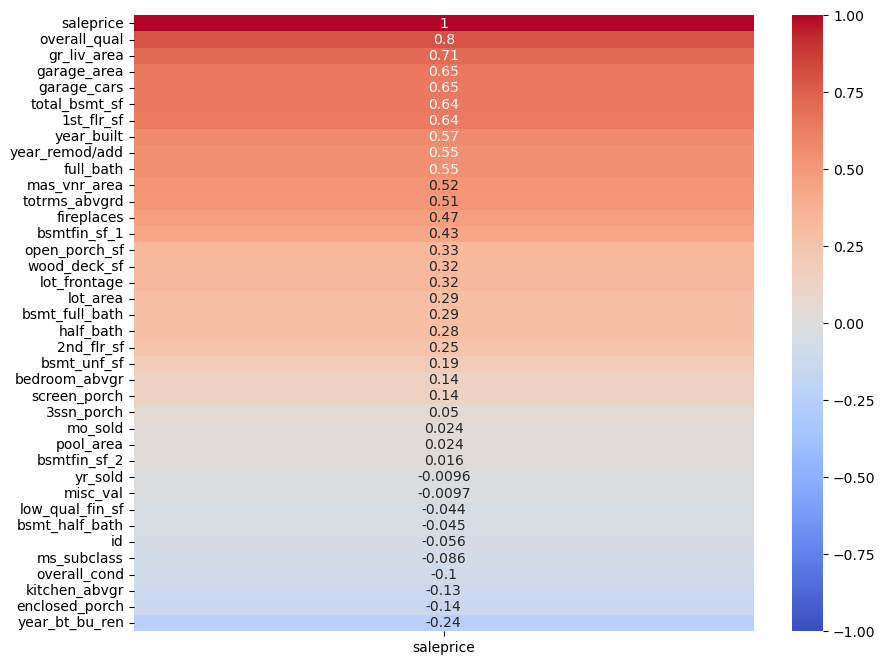

In [33]:
# correlation between features and target
plt.figure(figsize= (10,8))
sns.heatmap(df_final.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
           annot=True,
           vmin=-1,
           vmax=1,
           cmap = 'coolwarm');

### Creating my model based on major features

In [34]:
df_final.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.800944
gr_liv_area,0.710195
garage_area,0.650136
garage_cars,0.647933
total_bsmt_sf,0.644350
1st_flr_sf,0.638051
year_built,0.573394
year_remod/add,0.550369
full_bath,0.548028


In [35]:
# Defining X and y
X = df_final.drop(columns = ['saleprice', 'id', 'neighborhood'], axis =1)
y = df_final['saleprice']

In [36]:
# spliting X and y to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
# Standardizing
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [38]:
lr = LinearRegression()

In [39]:
# fir my Linear model to train data
lr.fit(X_train, y_train)

LinearRegression()

### Evaluating my model

In [40]:
#Train score
lr.score(X_train, y_train)

0.8448992686368351

In [41]:
#test score
lr.score(X_test, y_test)

0.8459647375915533

In [42]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5)

In [43]:
# lasso train score
lasso_cv.score(X_train, y_train)

0.8432412602050999

In [44]:
# lasso test score
lasso_cv.score(X_test, y_test)

0.8502022163608766

In [45]:
coef_df = pd.DataFrame({'features': X.columns, 'coefs': lasso_cv.coef_})
coef_df.sort_values('coefs', ascending = False).head(10)

,features,coefs
3,overall_qual,25298.434731
15,gr_liv_area,21497.984307
5,year_built,8255.224534
8,bsmtfin_sf_1,6150.916342
6,year_remod/add,6040.679314
22,totrms_abvgrd,5838.236348
7,mas_vnr_area,5721.456139
12,1st_flr_sf,5392.207064
30,screen_porch,3940.195169
24,garage_cars,3900.985737


In [46]:
coef_df.sort_values('coefs', ascending = False).tail()

,features,coefs
34,yr_sold,-745.925737
21,kitchen_abvgr,-2177.960771
20,bedroom_abvgr,-4786.226635
31,pool_area,-5619.596365
0,ms_subclass,-5730.473579


### Line Assumption

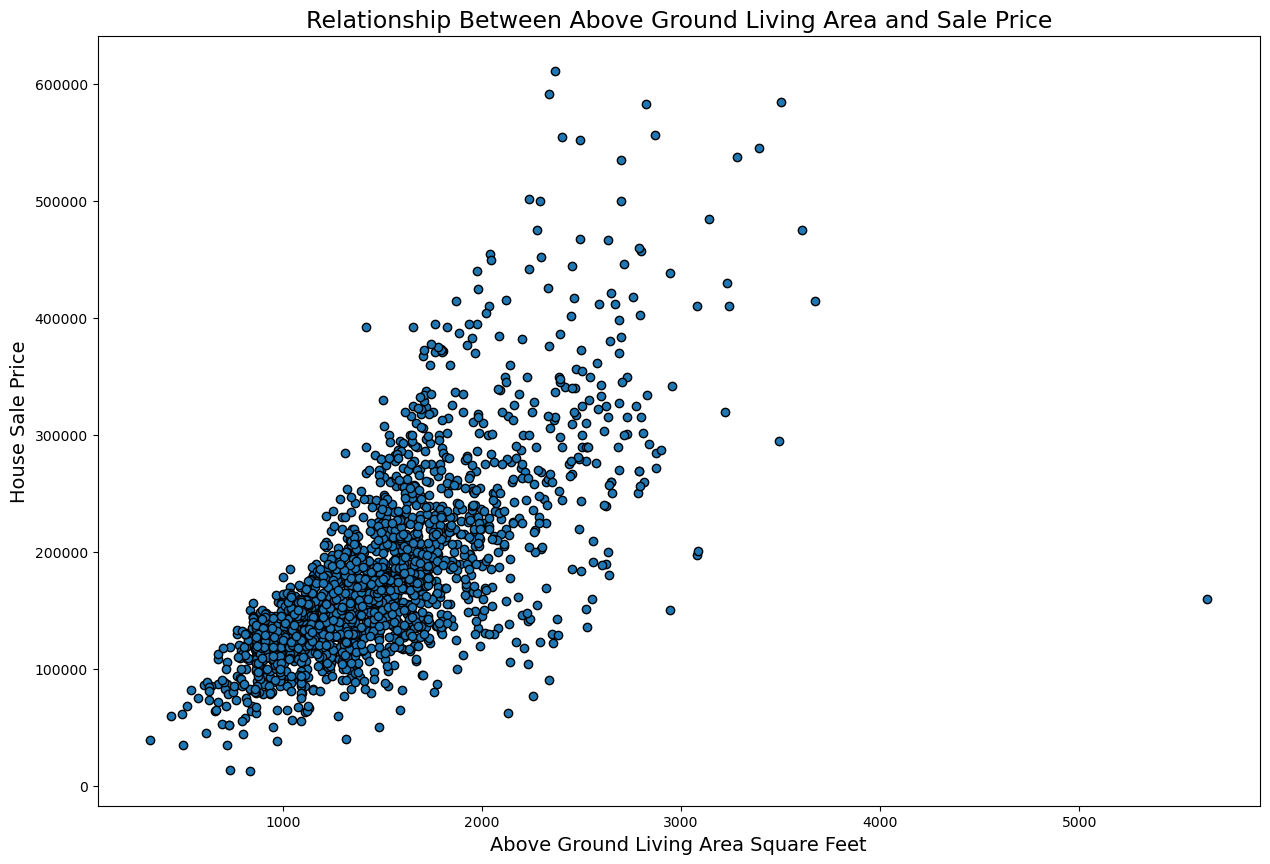

In [47]:
# L Linear Regression
plt.figure(figsize=(15,10))
plt.scatter(df_final['gr_liv_area'], df_final['saleprice'], edgecolor = 'black')
plt.title('Relationship Between Above Ground Living Area and Sale Price', fontsize='17')
plt.xlabel('Above Ground Living Area Square Feet', fontsize=14)
plt.ylabel('House Sale Price', fontsize=14);

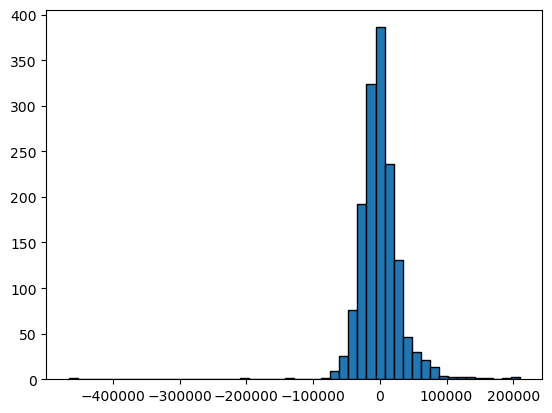

In [48]:
# N-Normality of error
y_preds = lasso_cv.predict(X_train)
resids = y_train - y_preds
plt.hist(resids, bins = 50, edgecolor = 'black');
# Fine

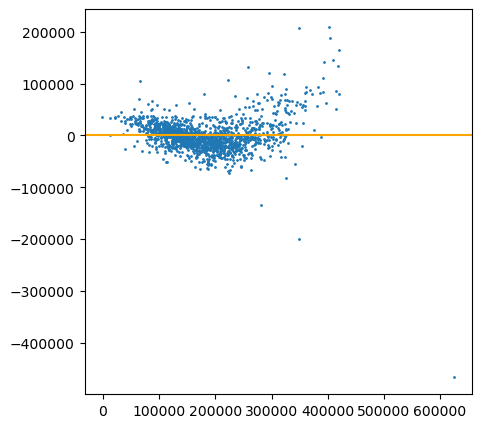

In [49]:
# E-Equality variance of errors
# Residual plot
plt.figure(figsize=(5,5))
plt.scatter(y_preds, resids, s=1)
plt.axhline(0, color='orange');

## Visualization

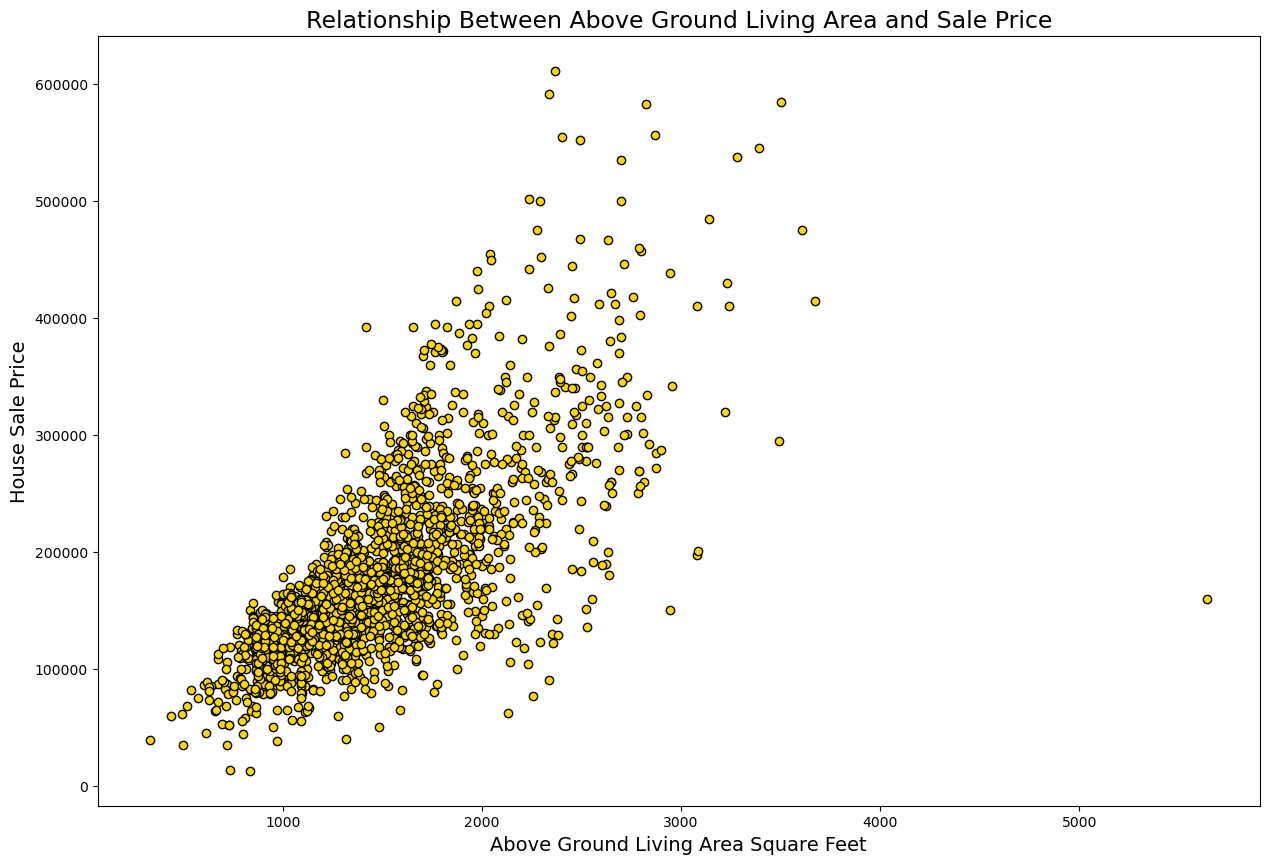

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(df_final['gr_liv_area'], df_final['saleprice'], c='gold', edgecolor = 'black')
plt.title('Relationship Between Above Ground Living Area and Sale Price', fontsize='17')
plt.xlabel('Above Ground Living Area Square Feet', fontsize=14)
plt.ylabel('House Sale Price', fontsize=14);

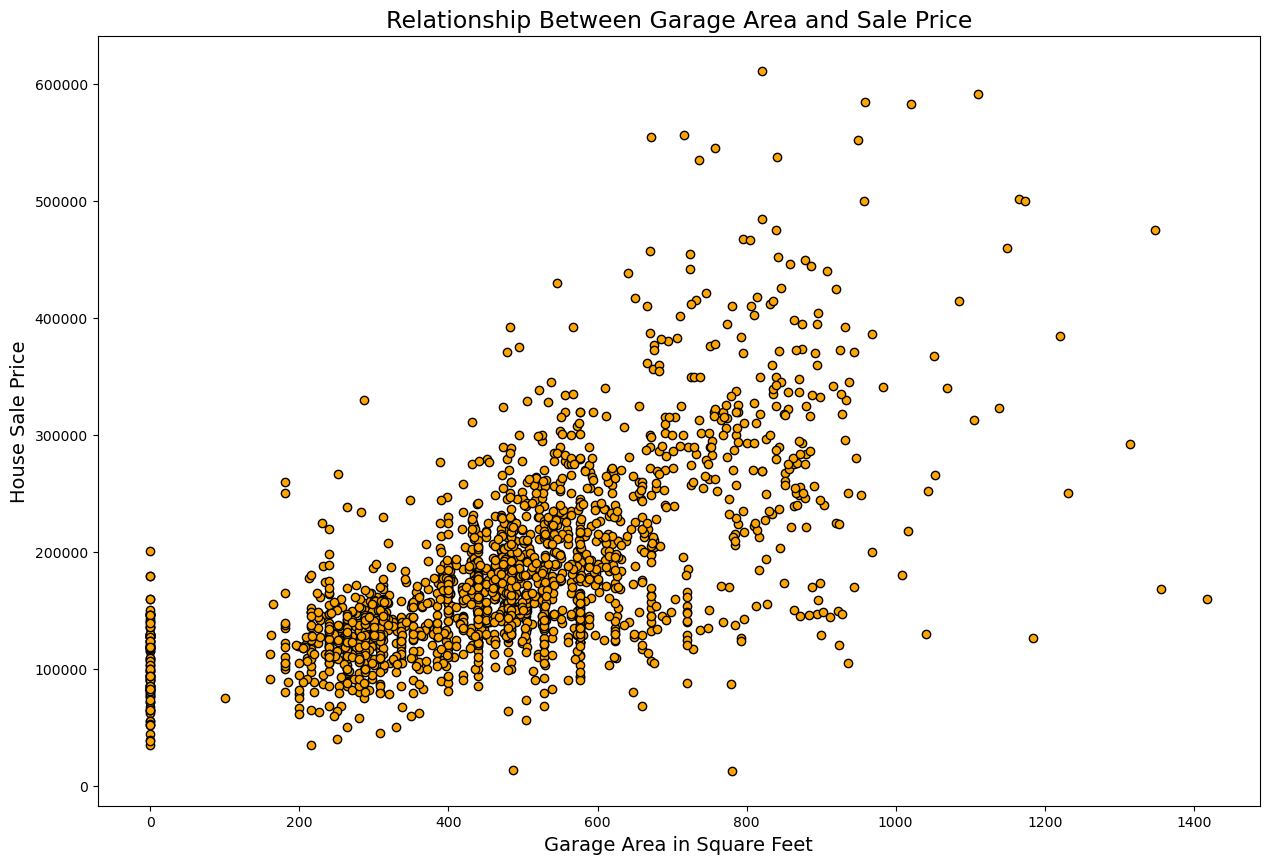

In [51]:
plt.figure(figsize=(15,10))
plt.scatter(df_final['garage_area'] , df_final['saleprice'], c='orange', edgecolor='black')
plt.title('Relationship Between Garage Area and Sale Price', fontsize=17)
plt.xlabel('Garage Area in Square Feet', fontsize=14)
plt.ylabel('House Sale Price', fontsize=14);

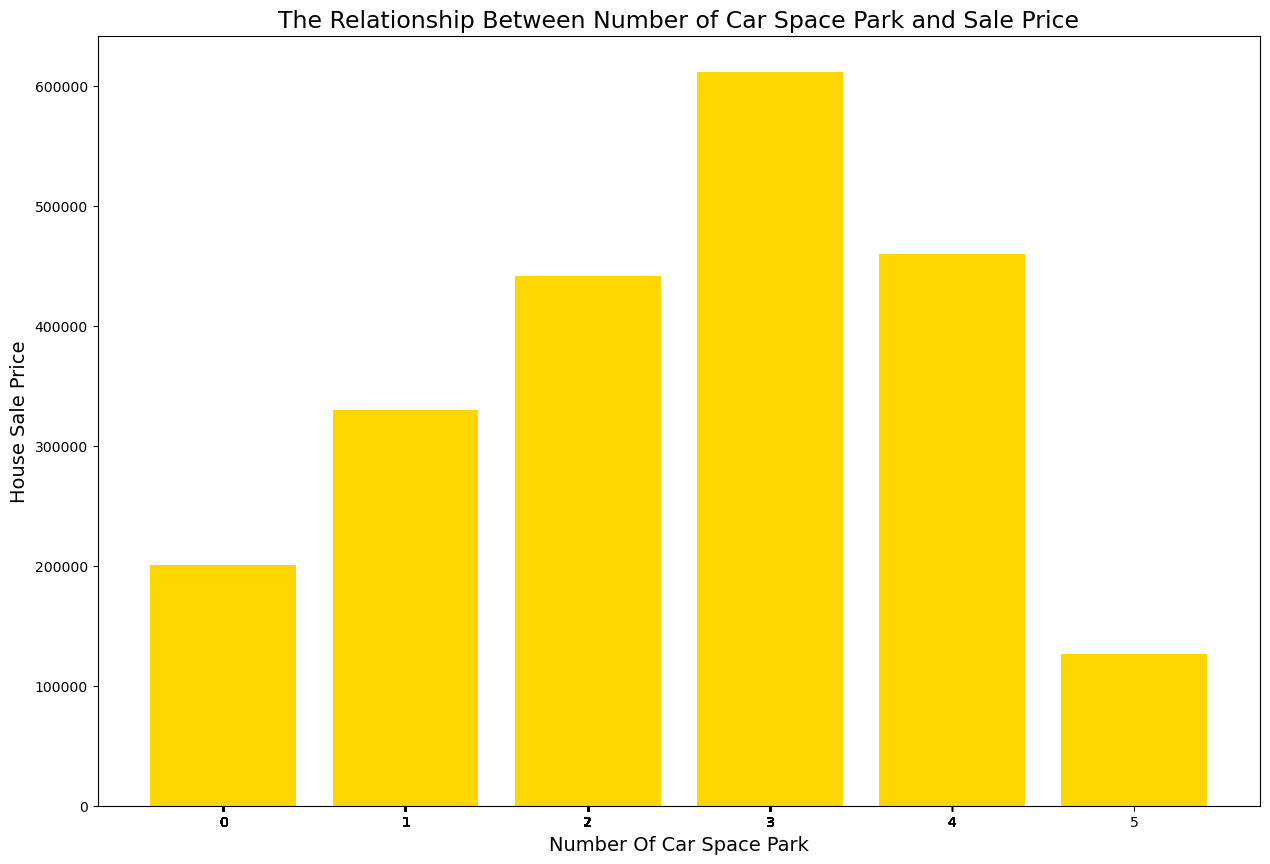

In [72]:
plt.figure(figsize=(15,10))
plt.bar(df_final['garage_cars'], df_final['saleprice'], color = ['gold', 'gold', 'gold', 'gold', 'gold', 'gold'])
plt.xticks(df_final['garage_cars'])
plt.yticks()
plt.title('The Relationship Between Number of Car Space Park and Sale Price', fontsize=17)
plt.xlabel('Number Of Car Space Park', fontsize=14)
plt.ylabel('House Sale Price', fontsize=14);

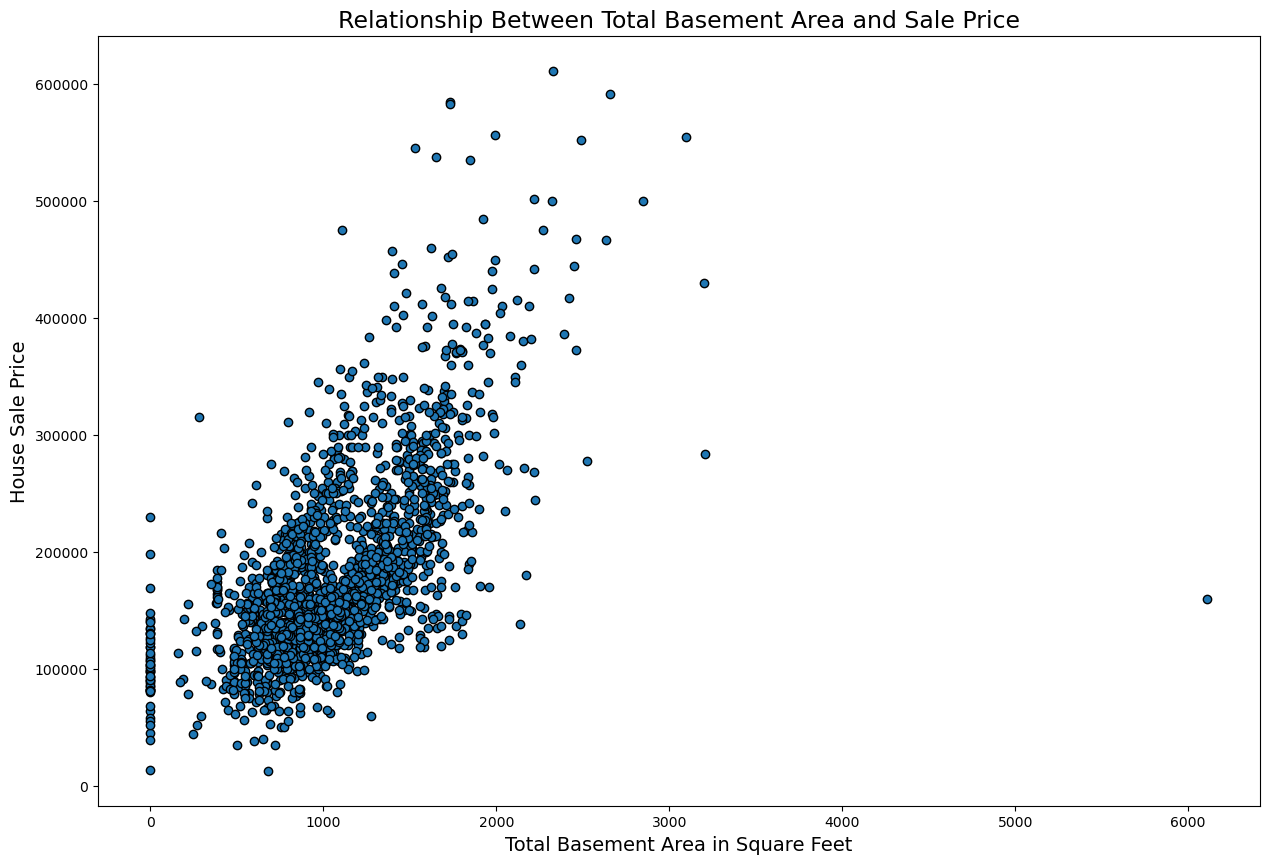

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(df_final['total_bsmt_sf'], df_final['saleprice'], edgecolor = 'black')
plt.title('Relationship Between Total Basement Area and Sale Price', fontsize='17')
plt.xlabel('Total Basement Area in Square Feet', fontsize=14)
plt.ylabel('House Sale Price', fontsize=14);

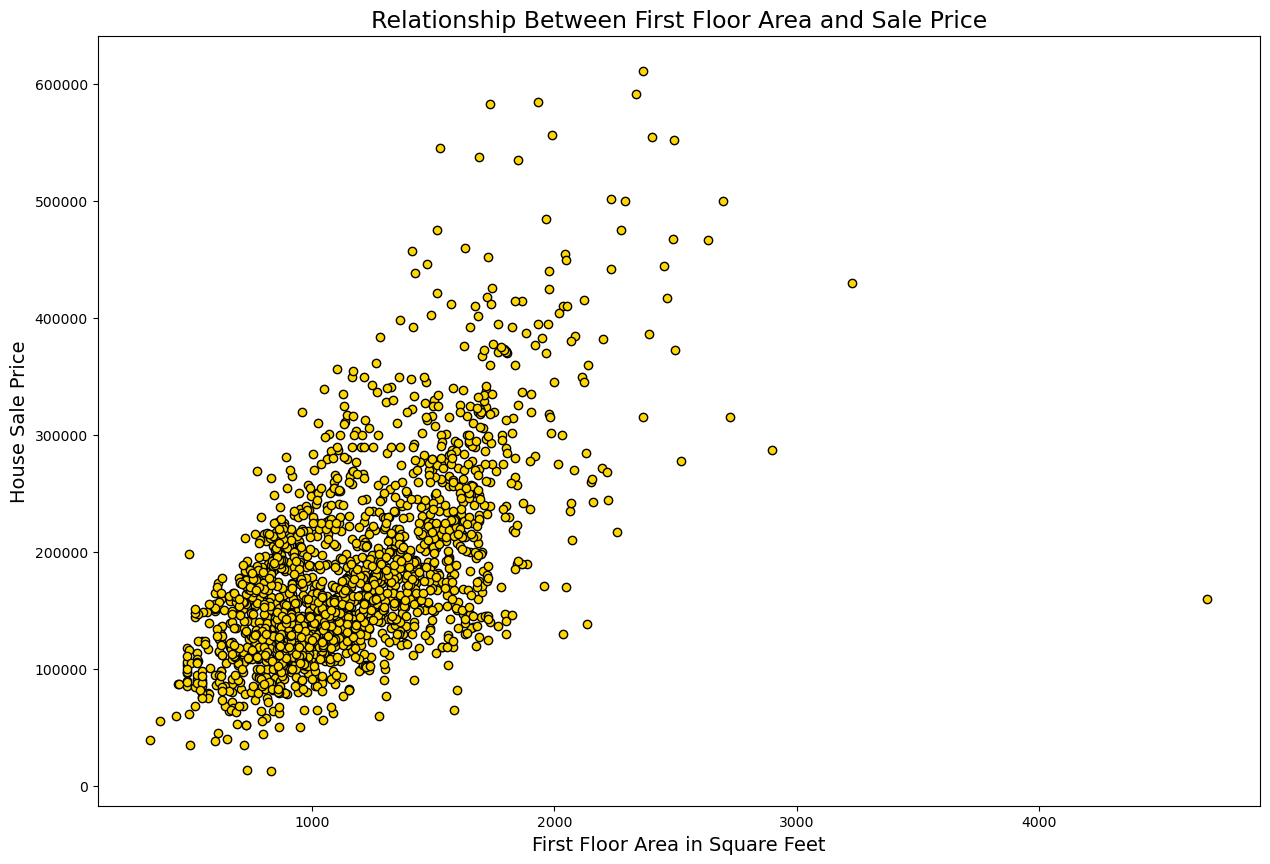

In [54]:
plt.figure(figsize=(15,10))
plt.scatter(df_final['1st_flr_sf'], df_final['saleprice'], c= 'gold',edgecolor = 'black')
plt.title('Relationship Between First Floor Area and Sale Price', fontsize='17')
plt.xlabel('First Floor Area in Square Feet', fontsize=14)
plt.ylabel('House Sale Price', fontsize=14);

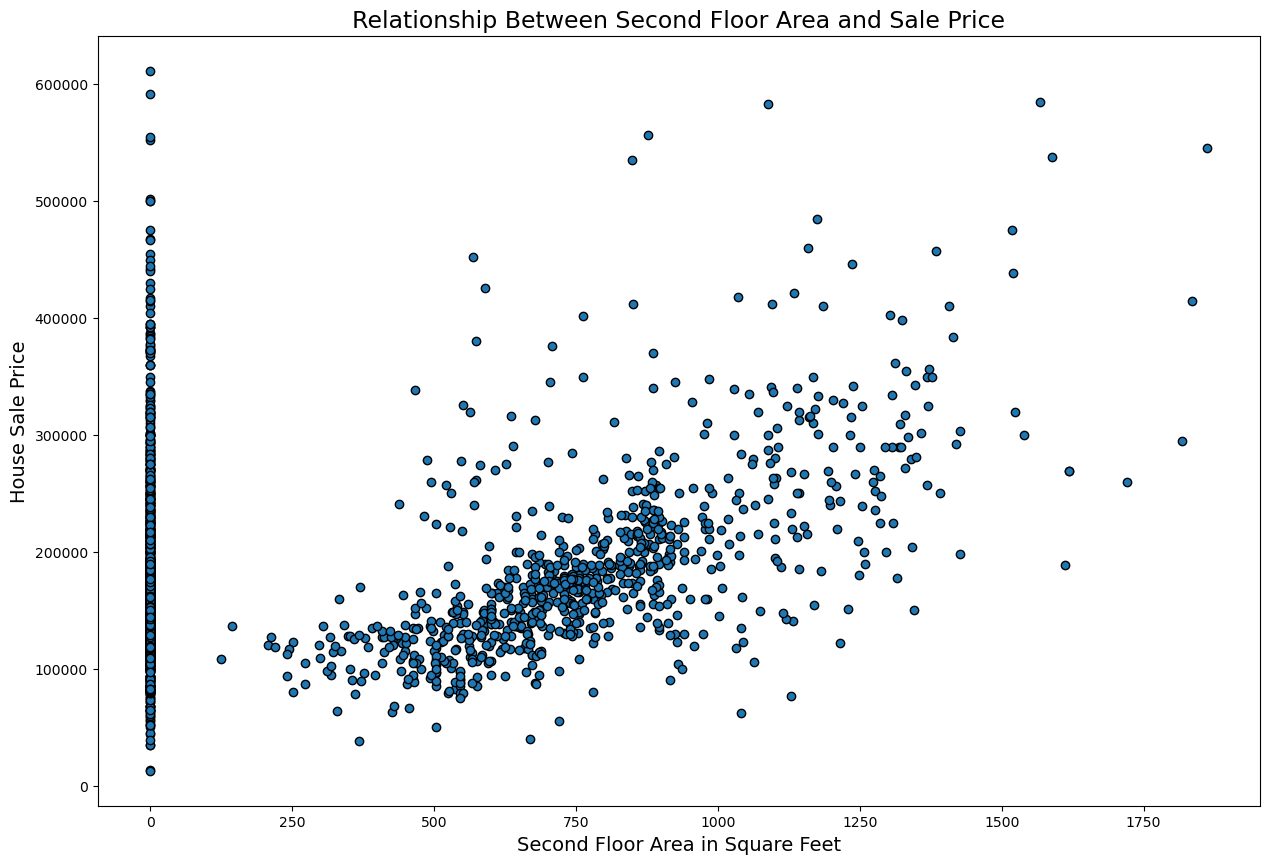

In [55]:
plt.figure(figsize=(15,10))
plt.scatter(df_final['2nd_flr_sf'], df_final['saleprice'], edgecolor = 'black')
plt.title('Relationship Between Second Floor Area and Sale Price', fontsize='17')
plt.xlabel('Second Floor Area in Square Feet', fontsize=14)
plt.ylabel('House Sale Price', fontsize=14);

In [64]:
df_final['full_bath'].astype('object')

0       2
1       2
2       1
3       2
4       2
       ..
2046    2
2047    1
2048    1
2049    1
2050    2
Name: full_bath, Length: 2015, dtype: object

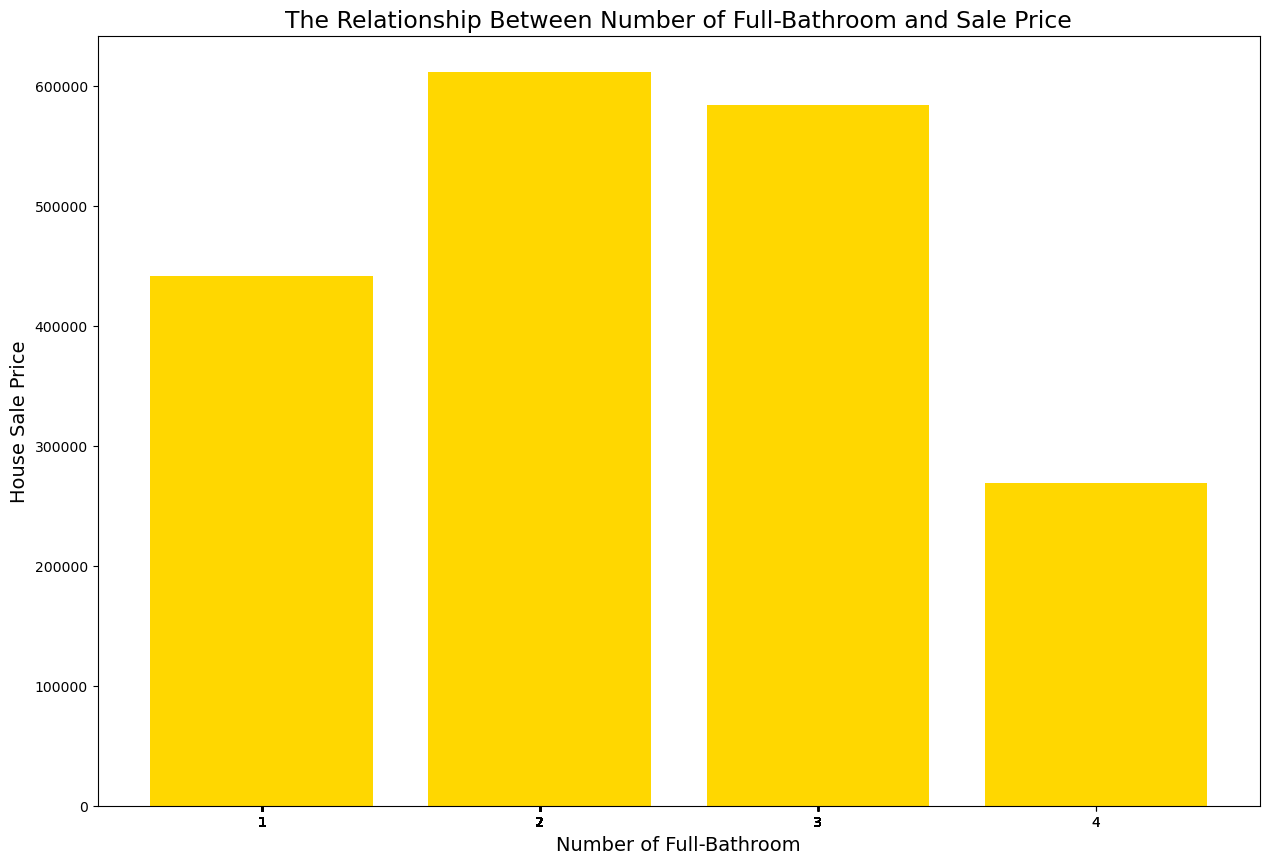

In [71]:
plt.figure(figsize=(15,10))
plt.bar(df_final['full_bath'], df_final['saleprice'], color = ['gold', 'gold', 'gold', 'gold'])
plt.xticks(df_final['full_bath'])
plt.title('The Relationship Between Number of Full-Bathroom and Sale Price', fontsize=17)
plt.xlabel('Number of Full-Bathroom', fontsize=14)
plt.ylabel('House Sale Price', fontsize=14);

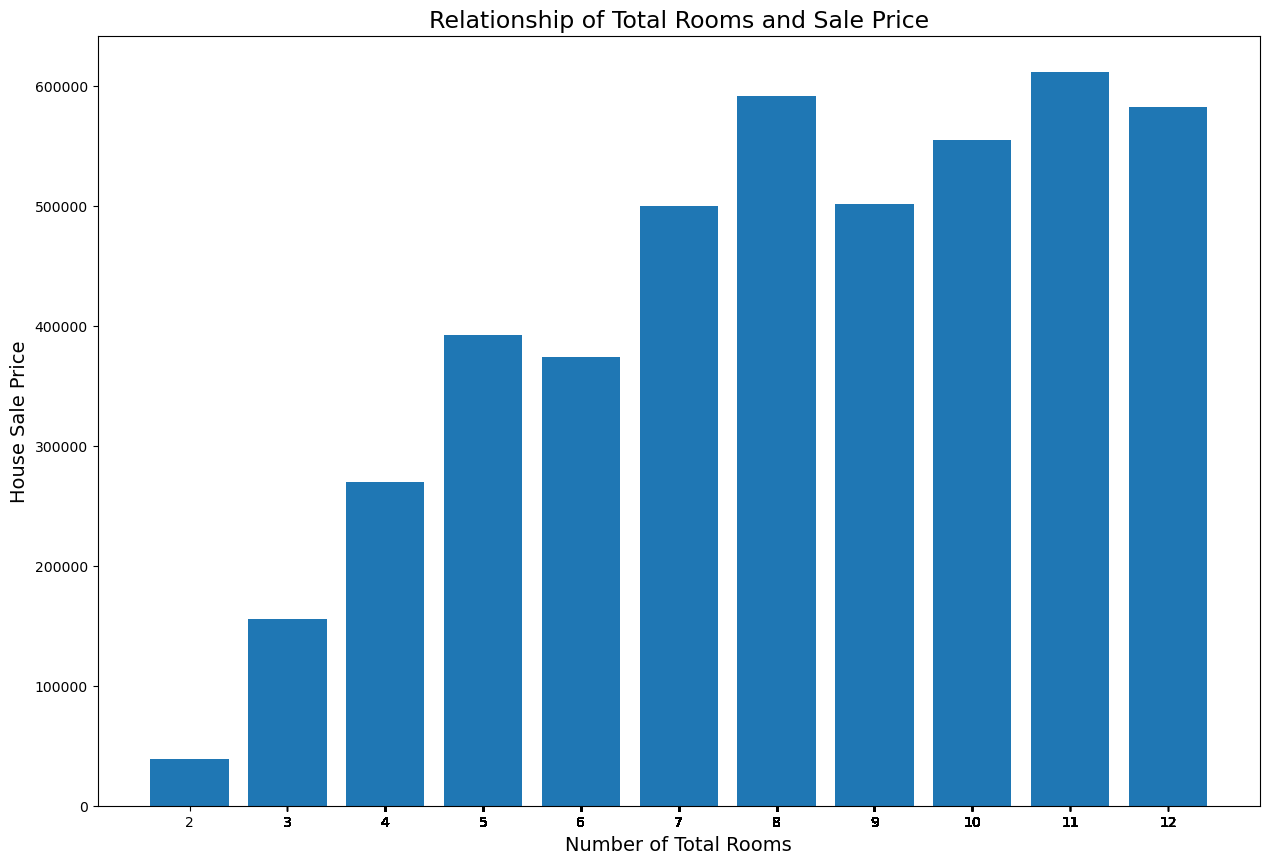

In [97]:
plt.figure(figsize=(15,10))
plt.bar(df_final['totrms_abvgrd'], df_final['saleprice'])
plt.xticks(df_final['totrms_abvgrd'])
plt.yticks()
plt.title('Relationship of Total Rooms and Sale Price', fontsize=17)
plt.xlabel('Number of Total Rooms', fontsize=14)
plt.ylabel('House Sale Price', fontsize=14);

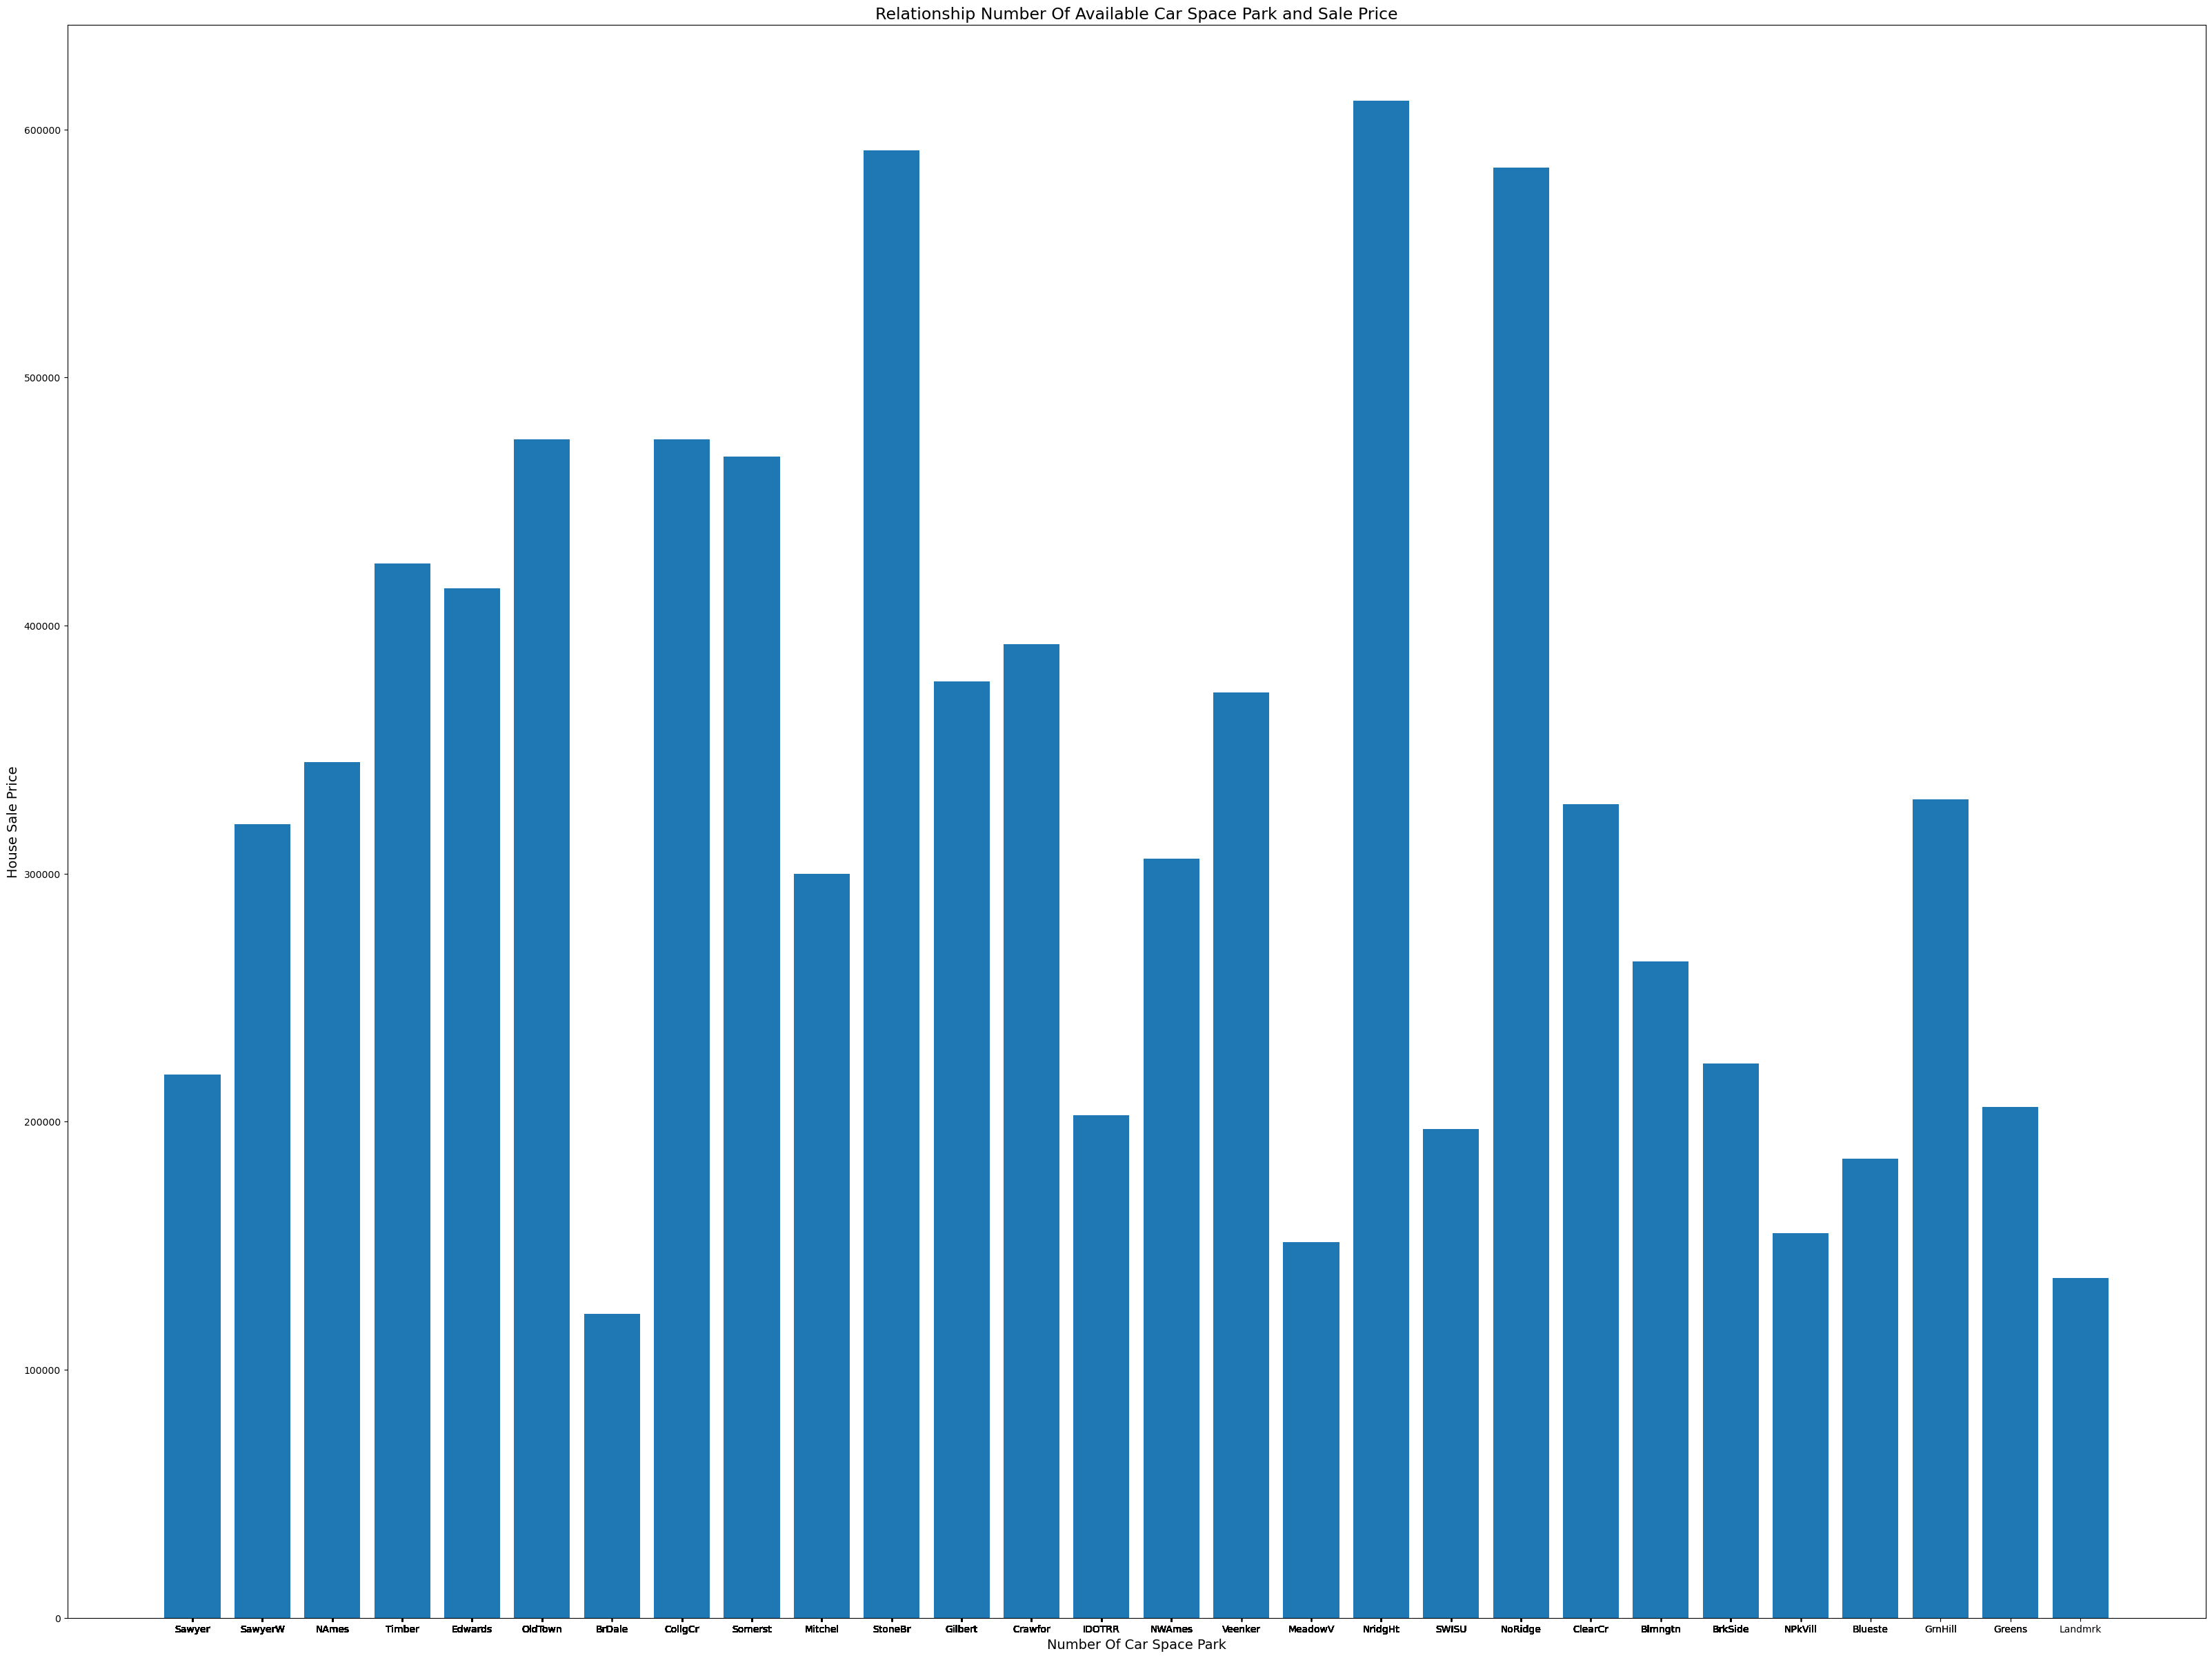

In [98]:
plt.figure(figsize=(40,30))
plt.bar(df_final['neighborhood'], df_final['saleprice'])
plt.xticks(df_final['neighborhood'])
plt.title('Relationship Number Of Available Car Space Park and Sale Price', fontsize=17)
plt.xlabel('Number Of Car Space Park', fontsize=14)
plt.ylabel('House Sale Price', fontsize=14);

In [99]:
df_final.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.800944
gr_liv_area,0.710195
garage_area,0.650136
garage_cars,0.647933
total_bsmt_sf,0.644350
1st_flr_sf,0.638051
year_built,0.573394
year_remod/add,0.550369
full_bath,0.548028


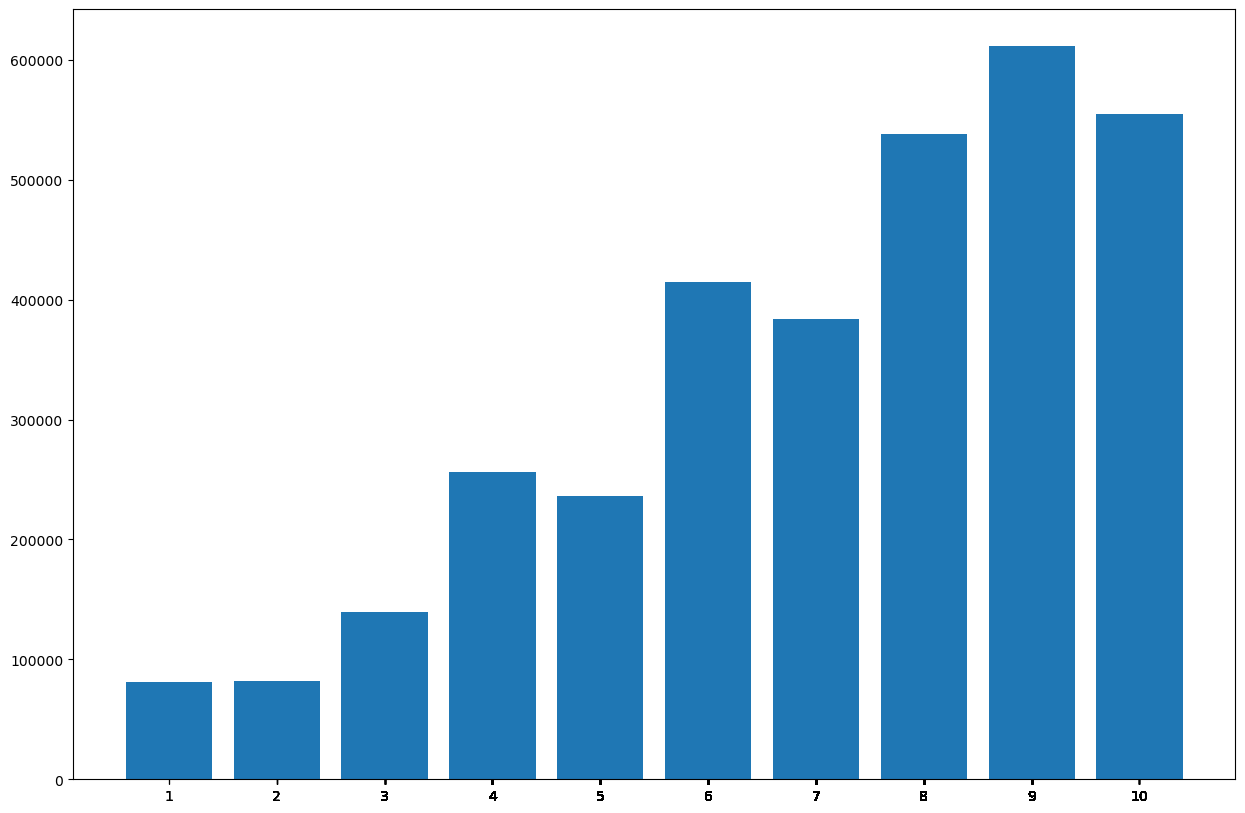

In [104]:
plt.figure(figsize=(15,10))
plt.bar(df_final['overall_qual'], df_final['saleprice'])
plt.xticks(df_final['overall_qual'])
plt.yticks();